In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras



C:\Users\Sidhant Katyal\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sidhant Katyal\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sidhant Katyal\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sidhant Katyal\anaconda3\lib\site-packages\tensorflow\python\framework

In [2]:
print(tf.__version__)
print(os.listdir(r"C:\Users\Sidhant Katyal\Desktop\input"))

1.14.0
['mnist_test.csv', 'mnist_train.csv']


In [3]:
train_data = pd.read_csv(r"C:\Users\Sidhant Katyal\Desktop\input\mnist_train.csv")
test_data = pd.read_csv(r"C:\Users\Sidhant Katyal\Desktop\input\mnist_test.csv")

class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

print(train_data.shape)
print(train_data.head())

(60000, 785)
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [4]:
train_x = train_data.iloc[:, 1:].values.astype('float32')
train_y = train_data.iloc[:, 0].values.astype('int32')

test_x = test_data.iloc[:, 1:].values.astype('float32')

train_x = train_x.reshape(train_x.shape[:1] + (28, 28, 1))
test_x = test_x.reshape(test_x.shape[:1] + (28, 28, 1))

train_y = keras.utils.to_categorical(train_y)
num_classes = train_y.shape[1]

train_x = train_x/255
test_x  = test_x/255

In [5]:
print(test_x.shape)
print(train_x.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [6]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, min_delta = 0, monitor = 'val_loss')]

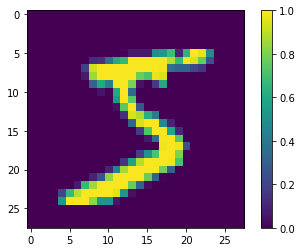

In [7]:
plt.figure()
plt.imshow(train_x[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

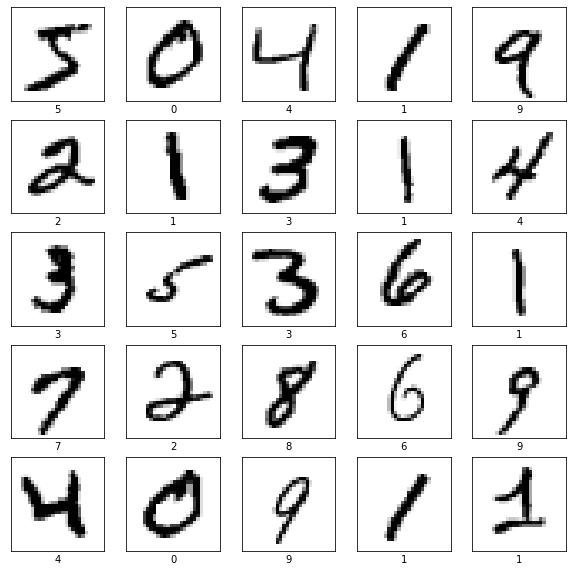

In [8]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i].reshape(28, 28), cmap = plt.cm.binary)
    plt.xlabel(class_names[np.argmax(train_y[i])])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1), strides = (1, 1), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(64, (3, 3), strides = (1, 1), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation = tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(optimizer = tf.train.AdamOptimizer(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [11]:
model.fit(x = train_x, y = train_y, batch_size = 32, epochs = 30, verbose = 2, callbacks = my_callbacks, validation_split = 0.05, shuffle = True)

Train on 57000 samples, validate on 3000 samples
Epoch 1/30
57000/57000 - 37s - loss: 0.1540 - acc: 0.9532 - val_loss: 0.0419 - val_acc: 0.9880
Epoch 2/30
57000/57000 - 32s - loss: 0.0496 - acc: 0.9845 - val_loss: 0.0342 - val_acc: 0.9913
Epoch 3/30
57000/57000 - 34s - loss: 0.0358 - acc: 0.9884 - val_loss: 0.0404 - val_acc: 0.9910
Epoch 4/30
57000/57000 - 32s - loss: 0.0285 - acc: 0.9909 - val_loss: 0.0397 - val_acc: 0.9920
Epoch 5/30
57000/57000 - 32s - loss: 0.0230 - acc: 0.9929 - val_loss: 0.0357 - val_acc: 0.9920


In [12]:
predictions = model.predict(test_x)

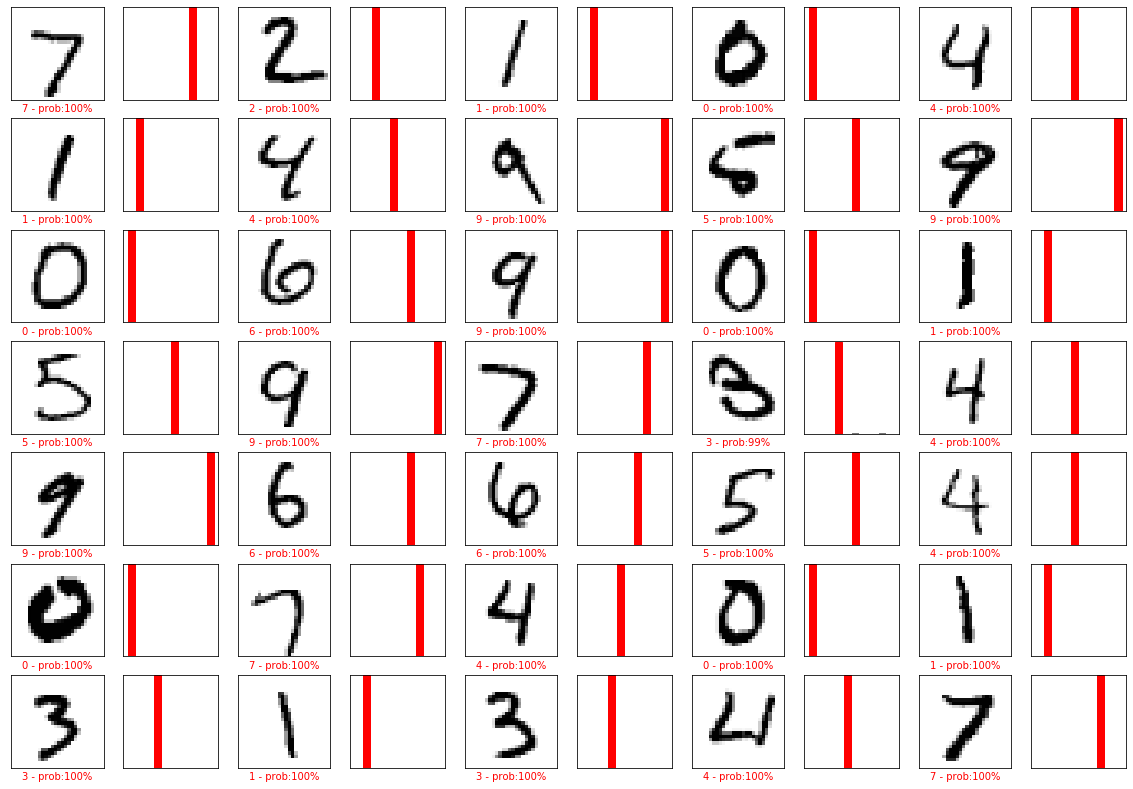

In [20]:
def plot_value_array(i, predictions_array):
    predictions_array = predictions_array[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    
def plot_image(i, predictions_array, img):
    img = img.reshape(img.shape[0], 28, 28)
    predictions_array, img = predictions_array[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    plt.xlabel("{} - prob:{:2.0f}%".format(class_names[predicted_label], 100*np.max(predictions_array)), color = 'red')
    
num_rows = 7
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_x)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions)
plt.show()